# Lebensmittel Data Visualization

In [11]:
import pandas as pd
ds_path = "data/LEBENSMITTEL.xlsx"
ds_path_others = "data/others_expenses.xlsx"
ds_path_extra = "data/extra_expenses.xlsx"
df_lebensmittel = pd.read_excel(ds_path, index_col=None)
df_others = pd.read_excel(ds_path_others, index_col=None)
df_extra = pd.read_excel(ds_path_extra, index_col=None)

In [13]:
df.head()

,angebote,brand,category,currency,datum,detail,filiale,laden,land,origin,preis,preis/unit,product,quantity,stadt,unit
0,False,DB,Mobilität,euro,2025-06-25,NaN,False,Deutsche Bahn,Deutschland,deutschland,58.00,58.00,DeutschlandTicket,1.0,Wiesbaden,units
1,False,Balea med,Skin Care,euro,2025-07-03,Barriereschutz,True,DM,Deutschland,NaN,8.90,4.45,Creme,2.0,Wiesbaden,units
2,False,WC-Frisch,Bad,euro,2025-07-03,Blau Kraft,True,DM,Deutschland,deutschland,3.25,3.25,WC Stein,1.0,Wiesbaden,units
3,False,Saugstark&Sicher,Küche,euro,2025-07-03,3 lagig 4 stuck,True,DM,Deutschland,deutschland,2.85,2.85,KüchenPapier,1.0,Wiesbaden,units
4,True,NaN,Other,euro,2025-07-31,NaN,True,ROSSMAN,Deutschland,NaN,5.49,5.49,Wärmflasche berry,1.0,Wiesbaden,units


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   angebote    28 non-null     float64       
 1   brand       52 non-null     object        
 2   category    64 non-null     object        
 3   currency    160 non-null    object        
 4   datum       169 non-null    datetime64[ns]
 5   detail      29 non-null     object        
 6   filiale     10 non-null     float64       
 7   laden       135 non-null    object        
 8   land        64 non-null     object        
 9   origin      32 non-null     object        
 10  preis       171 non-null    float64       
 11  preis/unit  171 non-null    float64       
 12  product     171 non-null    object        
 13  quantity    68 non-null     float64       
 14  stadt       64 non-null     object        
 15  unit        64 non-null     object        
dtypes: datetime64[ns](1), floa

In [ ]:
from toolkit.utils import convert_bolean_columns
convert_bolean_columns(df)
df["bio?"] = df["bio?"].astype("category")
df["vegan"] = df["vegan"].astype("category")
df["origin"] = df["origin"].astype("category")
df["angebote"] = df["angebote"].astype("category")
df["laden"] = df["laden"].astype("category")
df["filiale"] = df["filiale"].astype("category")
df["currency"] = df["currency"].astype("category")
df["stadt"] = df["stadt"].astype("category")
df["land"] = df["land"].astype("category")
df["product"] = df["product"].astype("category")
df["detail"] = df["detail"].astype("string")
df["brand"] = df["brand"].astype("category")
df["unit"] = df["unit"].astype("category")
df['preis'] = df['preis'].astype(str).str.replace(',', '.').astype(float)
df['datum'] = pd.to_datetime(df['datum'], format="%d.%m.%y")
df.info()


KeyError: 'vegan'

In [ ]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 8


In [ ]:
from toolkit.utils import get_nulll_data_info
get_nulll_data_info(df)

,datos sin NAs en q,Na en q,Na en %
filiale,33,395,92.29
quantity,37,391,91.36
origin,78,350,81.78
preis/unit,147,281,65.65
detail,164,264,61.68
brand,207,221,51.64
quantity/package,320,108,25.23
Buyed packages,347,81,18.93
unit,357,71,16.59
category,382,46,10.75


In [ ]:
from toolkit.utils import clean_text
df['product'] = df['product'].apply(clean_text)

## Distribución de productos comprados según:

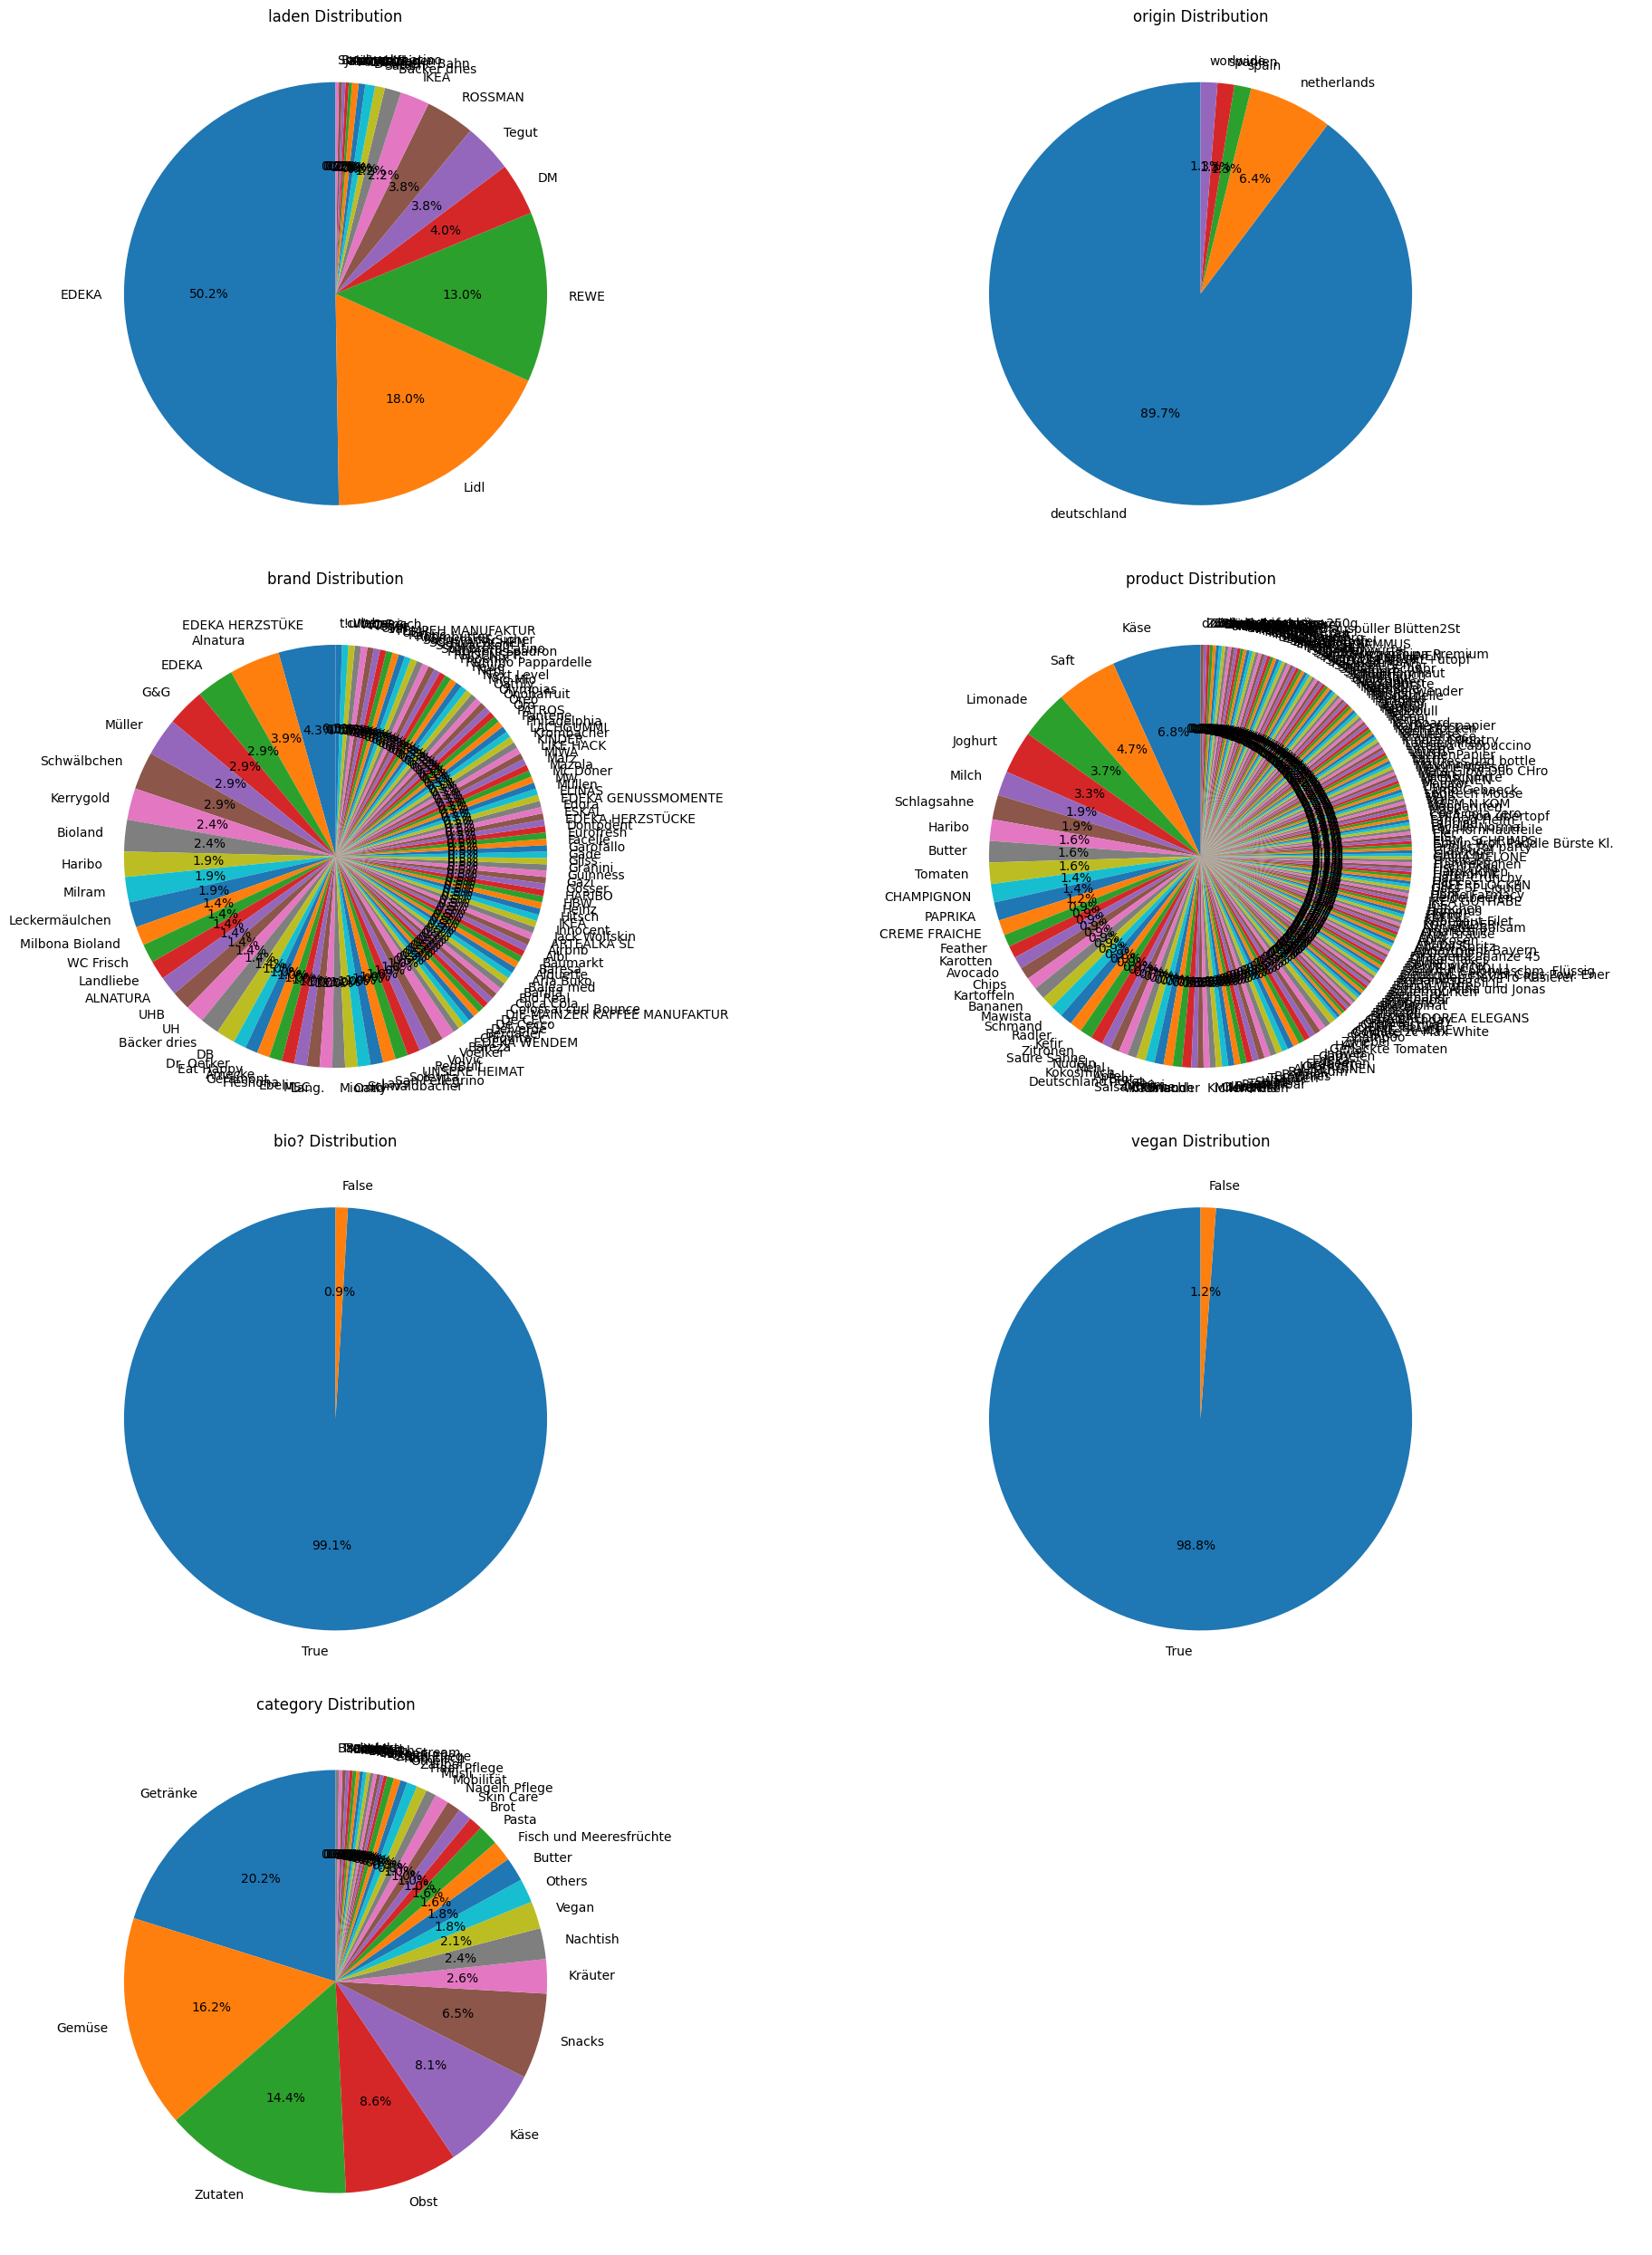

In [ ]:
from toolkit.utils import graph_pie
column_names = [
    "laden",
    "origin",
    "brand",
    "product",
    "bio?",
    "vegan",
    "category"
]
graph_pie(df, column_names=column_names, num_columns=2, figsize=(20, 25))

## Calculo de gastos a través del tiempo

In [ ]:
print(df['datum'].dtype)

datetime64[ns]


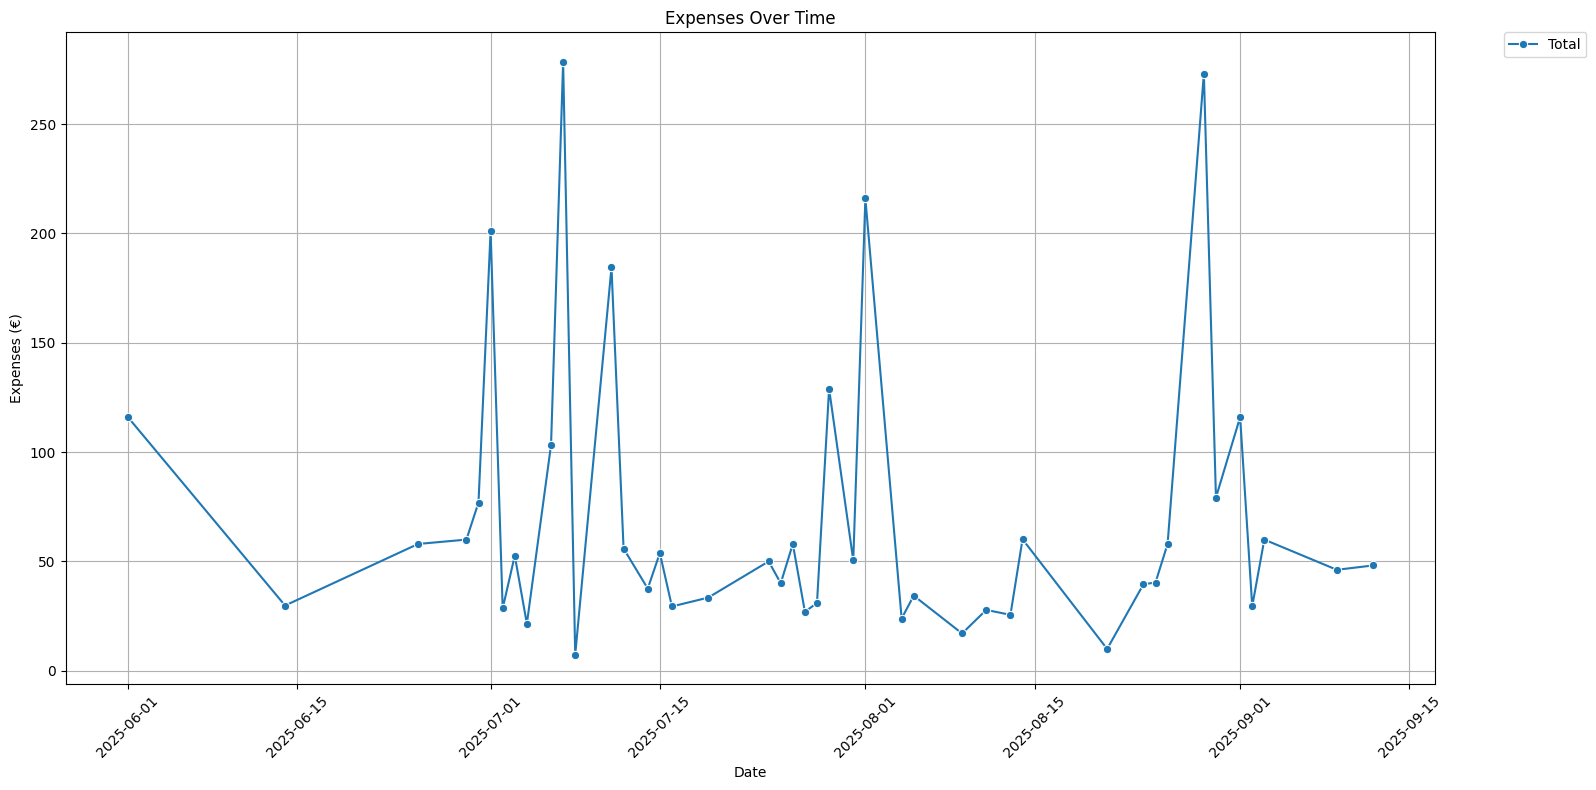

In [ ]:
from toolkit.utils import plot_expense_line
plot_expense_line(df)

/home/benja/projects/personal/lebensmittel-data/toolkit/utils.py:453: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


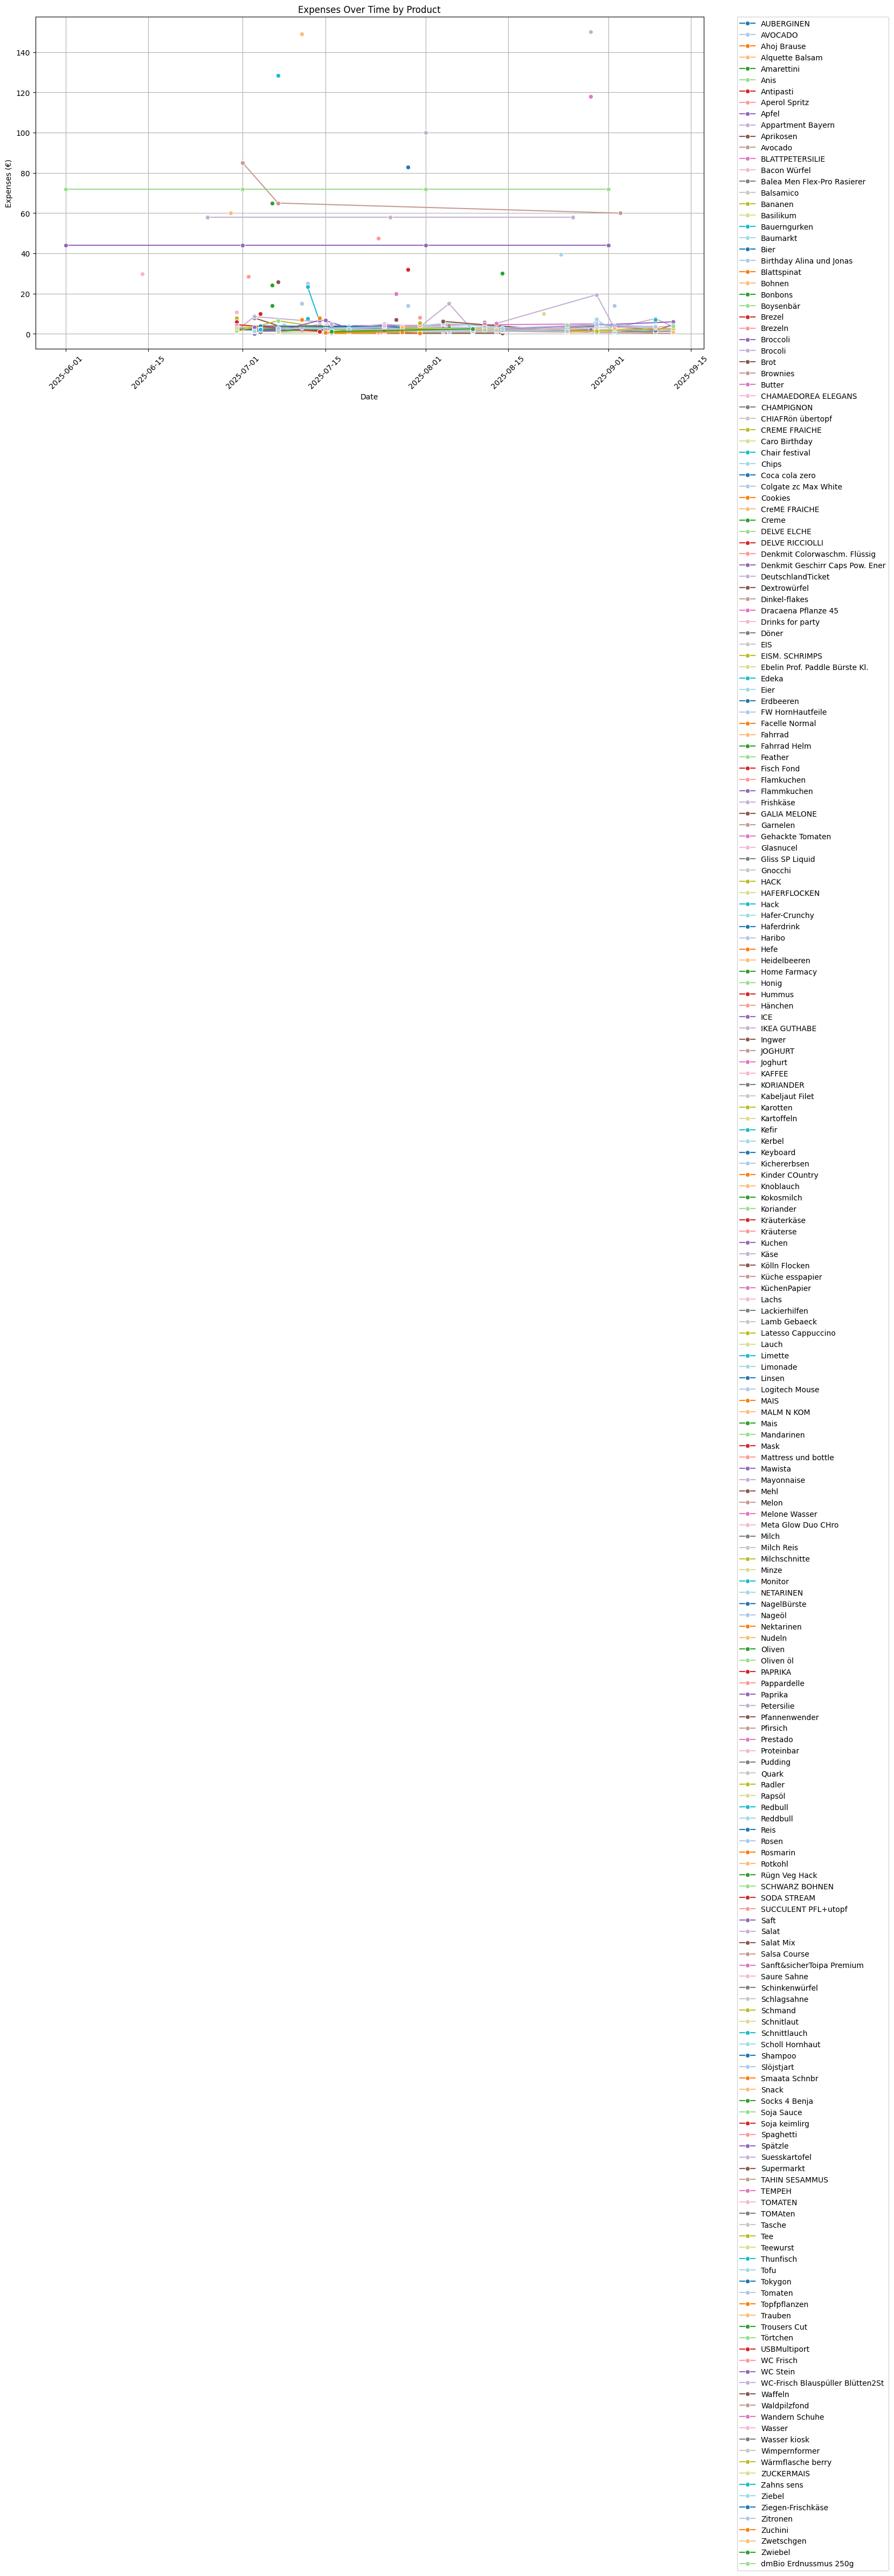

In [ ]:
plot_expense_line(df, group_by='product') 

## Gastos mensuales

In [ ]:
# Create Year-Month period
df['year_month'] = df['datum'].dt.to_period('M')

# Group by month and sum
monthly_sum = df.groupby('year_month')['preis'].sum().sort_index()

# Calculate cumulative sum
accumulated_expense = monthly_sum.cumsum()

# Combine into one DataFrame for display
result = pd.DataFrame({
    'Month': monthly_sum.index.strftime('%Y-%m'), 
    'Monthly Expense (€)': monthly_sum.values,
    'Cumulative Expense (€)': accumulated_expense.values
})

# Show the table
print(result)

     Month  Monthly Expense (€)  Cumulative Expense (€)
0  2025-06               340.81                  340.81
1  2025-07              1473.01                 1813.82
2  2025-08               905.23                 2719.05
3  2025-09               299.87                 3018.92
